In [189]:
#Reading R files data: scraped first 5 pages, then the other 4. Had to concat two r files
import pandas as pd
r_data1 = pd.read_csv('UdemyR.csv')
r_data2 = pd.read_csv('UdemyR_1.csv')
r_data = pd.concat([r_data1, r_data2], sort=True)
r_data['topic'] = "R_programming"
r_data=r_data.rename(columns={' instructor': 'instructor', ' rating': 'rating', ' price': 'price', ' num_voters ': 'num_voters'})
r_data['num_voters'] = r_data['num_voters']*(-1)
print(r_data.shape)
r_data.head(3)

(128, 6)


,instructor,num_voters,price,rating,courses,topic
0,Kirill Eremenko SuperDataScience Team,36294,16.99,4.6,R Programming A-Z™: R For Data Science With Re...,R_programming
1,Jose Portilla,12032,16.99,4.7,Data Science and Machine Learning Bootcamp with R,R_programming
2,Bogdan Anastasiei,2125,12.99,4.5,R Programming For Absolute Beginners,R_programming


In [190]:
r_data['courses'].value_counts()

Introduction to R Programming - A Modern Approach               5
Introduction to R Programming                                   5
RA: Data Science and Supply chain analytics.(A-Z with R)        4
R Data Pre-Processing & Data Management - Shape your Data!      1
Graphs in R - Data Visualization with R Programming Language    1
                                                               ..
R Fundamentals                                                  1
An Introduction to Data Visualization in R using ggplot         1
Image Processing in R Programming (magick and magickGUI)        1
Regression Data Mining Text Mining Forecasting using R          1
Statistics for Data Analysis Using R                            1
Name: courses, Length: 117, dtype: int64

In [191]:
r_data.loc[r_data['courses']=='Introduction to R Programming - A Modern Approach']

,instructor,num_voters,price,rating,courses,topic
7,Robert Jeutong,67,14.99,4.7,Introduction to R Programming - A Modern Approach,R_programming
25,Robert Jeutong,67,14.99,4.7,Introduction to R Programming - A Modern Approach,R_programming
30,Robert Jeutong,67,14.99,4.7,Introduction to R Programming - A Modern Approach,R_programming
53,Robert Jeutong,67,14.99,4.7,Introduction to R Programming - A Modern Approach,R_programming
76,Robert Jeutong,67,14.99,4.7,Introduction to R Programming - A Modern Approach,R_programming


In [192]:
#Getting rid of duplicates in R
r_data=r_data.drop_duplicates(subset=['courses'])
print(r_data.shape)

(117, 6)


In [193]:
#reading Stats file data
stat_data = pd.read_csv('UdemyStats.csv')
print(stat_data.shape)
stat_data.head(3)

(154, 5)


,courses,instructor,price,rating,num_voters
0,Become a Probability & Statistics Master,Krista King,30.99,4.6,(5669)
1,Workshop in Probability and Statistics,George Ingersoll,12.99,4.6,(3619)
2,Probability and Statistics for Business and Da...,Jose Portilla,12.99,4.4,(3471)


In [194]:
#Cleaning the data
stat_data['topic'] = 'Statistics'
stat_data['courses']
stat_data[' num_voters '] = stat_data[' num_voters '].str.strip('()')
stat_data = stat_data.rename(columns={' num_voters ': 'num_voters', ' instructor': 'instructor', ' rating': 'rating', ' price': 'price', ' num_voters ':'num_voters'})
stat_data.shape

(154, 6)

In [195]:
#Seeing if there are any duplicates in the stats data
stat_data['courses'].value_counts()

Introduction to Probability and Statistics                     8
Workshop in Probability and Statistics                         8
Become a Probability & Statistics Master                       8
Introduction to Statistics                                     2
Mathematical (Actuarial) Statistics:(Exam P/CT3/CS1)           1
                                                              ..
Statistics Fundamentals and its Applications                   1
Introducing One Variable Statistics with Excel 2016            1
Statistics with StatCrunch by the Math Sorcerer                1
Become a Master in Statistics for Data Science using Python    1
JMP Training for Statistics & Data Visualization               1
Name: courses, Length: 132, dtype: int64

In [196]:
#checking for duplicates - making sure that the repeating courses are the same course
stat_data.loc[stat_data['courses']=='Become a Probability & Statistics Master']

,courses,instructor,price,rating,num_voters,topic
0,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
6,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
29,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
52,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
75,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
98,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
120,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics
143,Become a Probability & Statistics Master,Krista King,30.99,4.6,5669,Statistics


In [197]:
#Getting rid of Duplicates
stat_data = stat_data.drop_duplicates(subset=['courses'])
stat_data.shape

(132, 6)

In [265]:
#Concatinating Stats and R data into a single Stat_R_Udemy database
Stat_R_Udemy = pd.concat([r_data, stat_data], sort=True).set_index('courses')
print(Stat_R_Udemy.shape)
Stat_R_Udemy.head(3)

(249, 5)


,instructor,num_voters,price,rating,topic
courses,,,,,
R Programming A-Z™: R For Data Science With Real Exercises!,Kirill Eremenko SuperDataScience Team,36294,16.99,4.6,R_programming
Data Science and Machine Learning Bootcamp with R,Jose Portilla,12032,16.99,4.7,R_programming
R Programming For Absolute Beginners,Bogdan Anastasiei,2125,12.99,4.5,R_programming


In [266]:
Stat_R_Udemy = Stat_R_Udemy.reset_index()
Stat_R_Udemy.head(3)

,courses,instructor,num_voters,price,rating,topic
0,R Programming A-Z™: R For Data Science With Re...,Kirill Eremenko SuperDataScience Team,36294,16.99,4.6,R_programming
1,Data Science and Machine Learning Bootcamp with R,Jose Portilla,12032,16.99,4.7,R_programming
2,R Programming For Absolute Beginners,Bogdan Anastasiei,2125,12.99,4.5,R_programming


In [200]:
#importing matplotlib
%matplotlib inline

In [201]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [202]:
#exploring the columns of object type
columns = Stat_R_Udemy.columns.tolist()

obj_columns = list(filter(lambda col: Stat_R_Udemy[col].dtype == object, columns))

for col in obj_columns:
    print(Stat_R_Udemy[col].value_counts().head(6))
    print('\n')

R Programming Certification Training: 2020 Edition           2
Statistics with R - Advanced Level                           2
Statistics in R - The R Language for Statistical Analysis    2
Statistics with R - Beginner Level                           2
Mathematical (Actuarial) Statistics:(Exam P/CT3/CS1)         1
Statistical Hypothesis Testing-1                             1
Name: courses, dtype: int64


Packt Publishing         17
Geoffrey Hubona Ph.D.    10
Bogdan Anastasiei         6
Laura Roberts             6
R-Tutorials Training      5
Easylearning guru         4
Name: instructor, dtype: int64


0    19
2    13
0     9
1     9
3     5
2     4
Name: num_voters, dtype: int64


Statistics       132
R_programming    117
Name: topic, dtype: int64




In [203]:
#studying the courses
Stat_R_Udemy['courses'].value_counts()

R Programming Certification Training: 2020 Edition            2
Statistics with R - Advanced Level                            2
Statistics in R - The R Language for Statistical Analysis     2
Statistics with R - Beginner Level                            2
Mathematical (Actuarial) Statistics:(Exam P/CT3/CS1)          1
                                                             ..
Statistics / Data Analysis in SPSS: Inferential Statistics    1
Learn By Example: Statistics and Data Science in R            1
Probability and Statistics for Business and Data Science      1
R for Statistics and Machine Learning by Project              1
JMP Training for Statistics & Data Visualization              1
Name: courses, Length: 245, dtype: int64

In [204]:
#making sure courses don't repeat within the same 'topic'
Stat_R_Udemy.loc[Stat_R_Udemy['courses']=='Statistics in R - The R Language for Statistical Analysis']

,courses,instructor,num_voters,price,rating,topic
97,Statistics in R - The R Language for Statistic...,R-Tutorials Training,262,12.99,4.5,R_programming
197,Statistics in R - The R Language for Statistic...,R-Tutorials Training,262,12.99,4.5,Statistics


In [205]:
Stat_R_Udemy['topic'].value_counts()

Statistics       132
R_programming    117
Name: topic, dtype: int64

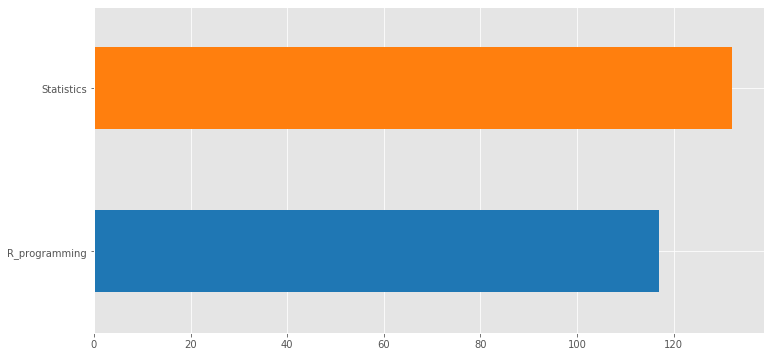

In [206]:
#132 "Statistics courses" and 117 "R_programming" courses offered
plt.figure(figsize=(12,6))
Stat_R_Udemy['topic'].value_counts(ascending = True).plot(kind='barh', color=['tab:blue','tab:orange'])

price  topic        
12.99  Statistics       126
       R_programming    105
13.99  R_programming      2
14.99  R_programming      2
15.99  R_programming      1
16.99  R_programming      6
18.99  Statistics         3
       R_programming      1
19.99  Statistics         2
30.99  Statistics         1
Name: topic, dtype: int64

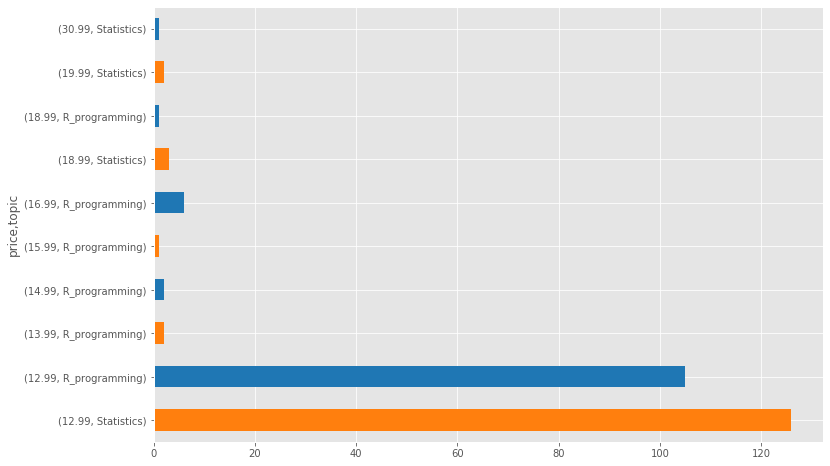

In [207]:
#plotting the pricing grouped by price and topic
plt.figure(figsize=(12,8))
courses_dollar_amount = Stat_R_Udemy.groupby('price')['topic'].value_counts(ascending = False)
#Stat_R_Udemy.groupby('price')['topic'].value_counts(ascending = False).plot(kind='barh', color=['y','c'])
courses_dollar_amount.plot(kind='barh', color=['tab:orange','tab:blue'])
courses_dollar_amount

In [208]:
#pricing -comparing the prices for both "Statistics" and "R_programming". A $30 outlier disturbs the graph
Stat_R_Udemy["Stats_pricing"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="Statistics"]["price"]
Stat_R_Udemy["R_pricing"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="R_programming"]["price"]
Stat_R_Udemy[["Stats_pricing","R_pricing"]].iplot(kind="histogram", bins=15, theme="white", 
                                                  title="Distribution or prices",
         xTitle='price', yTitle='Count')


In [209]:
#getting rid of a $30 outlier
Stat_R_Udemy['price'].sort_values(ascending=False)

117    30.99
232    19.99
196    19.99
132    18.99
154    18.99
       ...  
160    12.99
159    12.99
158    12.99
157    12.99
124    12.99
Name: price, Length: 249, dtype: float64

In [210]:
#getting rid of a $30 outlier
Stat_R_Udemy.loc[Stat_R_Udemy.index==117]

,courses,instructor,num_voters,price,rating,topic,Stats_pricing,R_pricing
117,Become a Probability & Statistics Master,Krista King,5669,30.99,4.6,Statistics,30.99,NaN


In [211]:
#getting rid of a $30 outlier
bad_df = Stat_R_Udemy.index.isin([117])
Stat_R_Udemy_2=Stat_R_Udemy[~bad_df]

In [212]:
#getting rid of a $30 outlier and comparing the prices for both "Statistics" and "R_programming"
Stat_R_Udemy_2["Stats_pricing"]=Stat_R_Udemy_2[Stat_R_Udemy_2["topic"]=="Statistics"]["price"]
Stat_R_Udemy_2["R_pricing"]=Stat_R_Udemy_2[Stat_R_Udemy_2["topic"]=="R_programming"]["price"]
Stat_R_Udemy_2[["Stats_pricing","R_pricing"]].iplot(kind="histogram", bins=2, theme="white", 
                                                  title="Distribution or prices",
         xTitle='price', yTitle='Count')

-0.020246055442249916


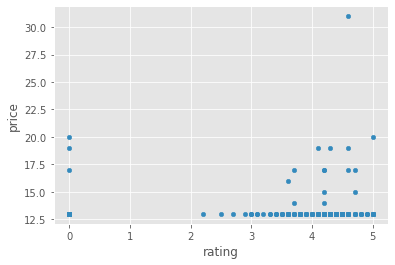

In [213]:
#checking the correlation between price and rating
print(Stat_R_Udemy['price'].corr(Stat_R_Udemy['rating']))
scatter_df = Stat_R_Udemy[['rating', 'price']]
scatter_df.plot.scatter(x='rating', y='price')

In [214]:
#plotting the ratings groupbied by topic "Statistics" and "R_programming"
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Layout, Histogram
import plotly.offline
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [215]:
#plotting the ratings groupbied by topic "Statistics"
Stat_R_Udemy["Stats_rating"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="Statistics"]["rating"]
Stat_R_Udemy["Stats_rating"].iplot(kind="histogram", bins=20, theme="white", 
                          title="Distribution or ratings in Stats",xTitle='rating', yTitle='Count')

In [216]:
#plotting the ratings groupbied by topic "R_programming"
Stat_R_Udemy["R_rating"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="R_programming"]["rating"]
Stat_R_Udemy["R_rating"].iplot(kind="histogram", bins=20, theme="white", 
                          title="Distribution or ratings in R_programming",xTitle='rating', yTitle='Count')

In [217]:
#comparing the ratings 
Stat_R_Udemy["Stats_rating"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="Statistics"]["rating"]
Stat_R_Udemy["R_rating"]=Stat_R_Udemy[Stat_R_Udemy["topic"]=="R_programming"]["rating"]
Stat_R_Udemy[["Stats_rating","R_rating"]].iplot(kind="histogram", bins=20, theme="white", title="Distribution or ratings",
         xTitle='rating', yTitle='Count')

In [218]:
Stat_R_Udemy['num_voters']=Stat_R_Udemy['num_voters'].astype(float)

0.10477254027810022


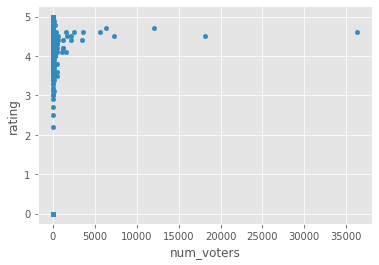

In [219]:

print(Stat_R_Udemy['rating'].corr(Stat_R_Udemy['num_voters']))
scatter_df = Stat_R_Udemy[['num_voters', 'rating']]
scatter_df.plot.scatter(x='num_voters', y='rating')

In [230]:
len(Stat_R_Udemy['instructor'].unique())

162

topic
R_programming    AxesSubplot(0.125,0.125;0.775x0.755)
Statistics       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

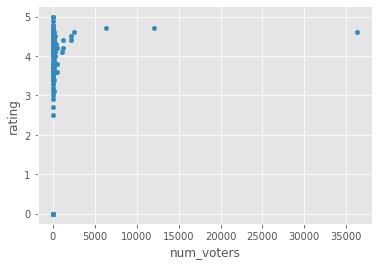

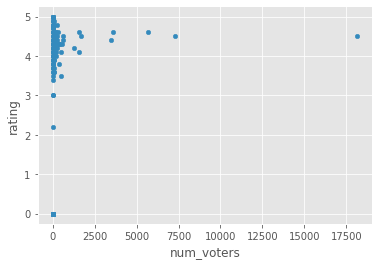

In [237]:
scatter_df = Stat_R_Udemy.groupby('topic')[['num_voters', 'rating']]
scatter_df.plot.scatter(x='num_voters', y='rating')

In [238]:
Stat_R_Udemy.groupby('topic')['num_voters'].sum()

topic
R_programming    72986.0
Statistics       52931.0
Name: num_voters, dtype: float64

In [242]:
len(Stat_R_Udemy['instructor'].unique())

162

In [282]:
mult=Stat_R_Udemy.groupby('instructor').filter(lambda x: len(x) > 1)
len(mult[mult['rating']>4.0])

76